In [ ]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 54.1 MB/s eta 0:00:00


In [ ]:
pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.4 MB/s eta 0:00:00


In [ ]:
import netCDF4 as nc4
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [ ]:
fn = '/content/IMERG-Final.CLIM.200006-202305.V07B.nc4'
# f = nc4.Dataset(fn, 'r')
f = xr.open_dataset(fn)

In [ ]:
f.keys()

KeysView(<xarray.Dataset>
Dimensions:        (lat: 1800, lon: 3600)
Coordinates:
  * lat            (lat) float32 -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
  * lon            (lon) float32 -179.9 -179.9 -179.8 ... 179.8 179.9 179.9
Data variables:
    precipitation  (lon, lat) float32 ...
Attributes:
    title:        IMERG (runname[run] Grand Climatological Precipitation (Jun...
    author:       Jackson Tan (jackson.tan@nasa.gov)
    description:  Average of all valid daily precipitation from June 2000 to ...
    version:      V07B
    history:      File created on 2024-01-17 12:49:44 UTC.
    source:       IMERG Final Daily Precipitation (10.5067/GPM/IMERGDF/DAY/07)
    comment:      A value is given only in a grid box if at least 90% of the ...
    Conventions:  CF-1.8)

In [ ]:
f.data_vars

Data variables:
    precipitation  (lon, lat) float32 ...

In [ ]:
f.coords

Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9

In [ ]:
ds = f.precipitation
ds

<xarray.DataArray 'precipitation' (lon: 3600, lat: 1800)>
[6480000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
Attributes:
    long_name:  climatological precipitation
    units:      mm / yr

In [ ]:
ds.lon.values

array([-179.95, -179.85, -179.75, ...,  179.75,  179.85,  179.95],
      dtype=float32)

Then we try a sample plot to see if we have the right parameters.

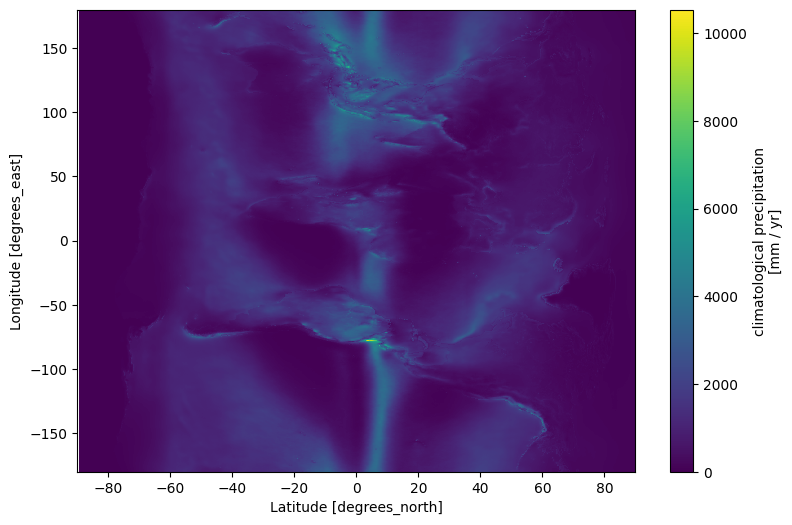

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

ds.plot(ax=ax)

In [ ]:
groups = [ x for x in f.keys() ]
print(groups)

['precipitation']


In [ ]:
# Get the precipitation, latitude, and longitude variables
# precip = ds[:][:]
# precip = np.transpose(precip)
# theLats = f['lat'][:]
# theLons = f['lon'][:]
# x, y = np.float32(np.meshgrid(theLons, theLats))

allprecip = ds.values
# filled_precip = np.nan_to_num(allprecip, nan=100.0)
masked_precip = np.ma.masked_invalid(allprecip)
precip = np.transpose(masked_precip)
theLats = ds.lat.values
theLons = ds.lon.values
x, y = np.float32(np.meshgrid(theLons, theLats))


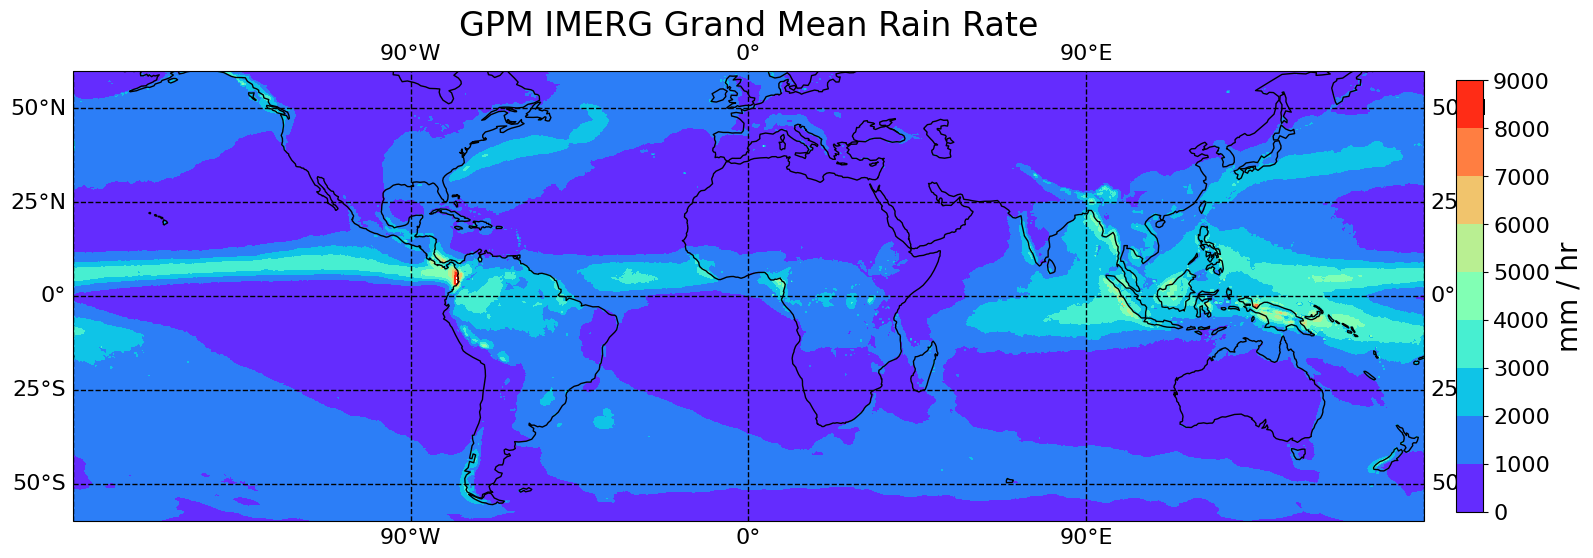

In [ ]:
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(21,7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180,180,-60,60])

# Add coastlines and formatted gridlines
ax.coastlines(resolution="110m",linewidth=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([-60, -50, -25, 0, 25, 50, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':16, 'color':'black'}
gl.ylabel_style = {'size':16, 'color':'black'}

# Set contour levels and draw the plot
clevs = np.arange(0,10000,1000)
plt.contourf(x, y, precip, clevs, cmap=plt.cm.rainbow)
plt.title('GPM IMERG Grand Mean Rain Rate', size=24)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('mm / hr',size=20)
cb.ax.tick_params(labelsize=16)

In [ ]:
fig.savefig('GPM_3IMERG_plot.png', bbox_inches='tight', pad_inches = 0.1)


In [ ]:
fn = '/content/IMERG-Final.CLIM.200006-202305.V07B.nc4'
f = xr.open_dataset(fn)

In [1]:
f.data_vars

NameError: name 'f' is not defined

In [ ]:
ds = f.precipitation
ds

In [ ]:
allprecip = ds.values
# filled_precip = np.nan_to_num(allprecip, nan=100.0)
masked_precip = np.ma.masked_invalid(allprecip)
precip = np.transpose(masked_precip)
theLats = ds.lat.values
theLons = ds.lon.values
x, y = np.float32(np.meshgrid(theLons, theLats))

In [ ]:
def plot_monthly_climatology(month, ):
  # Set the figure size, projection, and extent
  fig = plt.figure(figsize=(21,7))
  ax = plt.axes(projection=ccrs.PlateCarree())
  ax.set_extent([-180,180,-60,60])

  # Add coastlines and formatted gridlines
  ax.coastlines(resolution="110m",linewidth=1)
  gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=1, color='black', linestyle='--')
  gl.xlabels_top = False
  gl.ylabels_right = False
  gl.xlines = True
  gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
  gl.ylocator = mticker.FixedLocator([-60, -50, -25, 0, 25, 50, 60])
  gl.xformatter = LONGITUDE_FORMATTER
  gl.yformatter = LATITUDE_FORMATTER
  gl.xlabel_style = {'size':16, 'color':'black'}
  gl.ylabel_style = {'size':16, 'color':'black'}

  # Set contour levels and draw the plot
  clevs = np.arange(0,10000,1000)
  plt.contourf(x, y, precip, clevs, cmap=plt.cm.rainbow)
  plt.title(f'Monthly precipitation climatology for {Month}', size=24)
  cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
  cb.set_label('mm / hr',size=20)
  cb.ax.tick_params(labelsize=16)

In [ ]:
for i in months:
  plot_monthly_climatology()

plt.show()